In [1]:
import pandas as pd
import numpy as np
from os import listdir

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import CenteredNorm
%matplotlib inline

In [3]:
from sklearn import metrics
from scipy import stats

In [4]:
def merge_results_frames(df,df2):
    for idx,r in df.iterrows():
        g = r['gamma']
        p = r['bias']
        for col in df.columns:
            if col == 'gamma' or col == 'bias':
                continue
            df.loc[(df['gamma']==g) & (df['bias']==p),col]+=df2.loc[(df2['gamma']==g) & (df2['bias']==p),col]

def str2list(strarray):
    return [float(x) for x in strarray.strip('[] ').split()]

def df_str2list(df):
    for col in df.columns:
        if col == 'gamma' or col == 'bias':
            continue
        df[col] = df[col].apply(str2list)

In [5]:
results_dir='Results100/'

resdict = {}
first = True
for filename in listdir(results_dir):
    if first:
        df = pd.read_csv(results_dir+filename)
        df_str2list(df)
        first = False
    else:
        df2 = pd.read_csv(results_dir+filename)
        df_str2list(df2)
        merge_results_frames(df,df2)

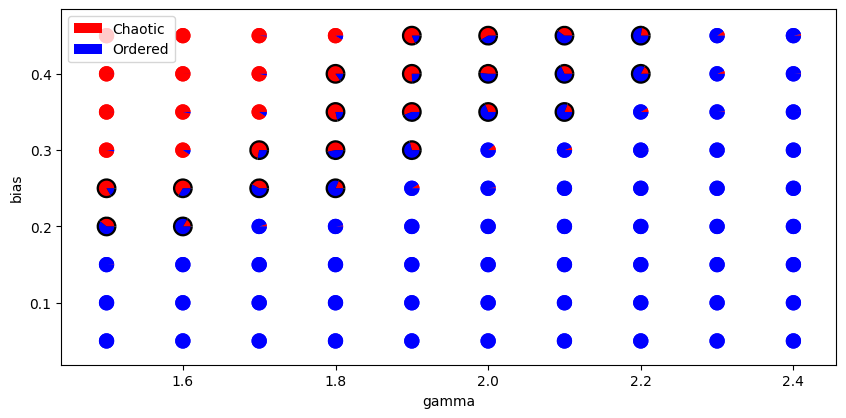

In [6]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
varx = 'gamma'
vary = 'bias'
for _,row in df.iterrows():
    x = np.mean(row[varx])
    y = np.mean(row[vary])
    ones = np.mean([derrida > 1 for derrida in row['Derrida']])
    ax.pie([ones, 1-ones], center=(x, y), radius=0.01, colors=['r', 'b'], frame=True)
    if ones > 0.85 or ones < 0.15:
        ax.pie([ones, 1-ones], center=(x, y), radius=0.01, colors=['r', 'b'], frame=True)
    else:
        ax.pie([ones, 1-ones], center=(x, y), radius=0.013, colors=['k', 'k'], frame=True)
        ax.pie([ones, 1-ones], center=(x, y), radius=0.01, colors=['r', 'b'], frame=True)
    #ones = [derrida > 1 for derrida in row['Derrida']]
    

legend_elements = [Patch(facecolor='r', label='Chaotic'), Patch(facecolor='b', label='Ordered')]
plt.xlabel(varx)
plt.ylabel(vary)
ax.legend(handles=legend_elements, loc='best')

In [7]:
dictall = {}
for _,row in df.iterrows():
    for col in df.columns:
        if col in ['gamma','bias']:
            rowlist = [row[col]]*len(row['Derrida'])
        else:
            rowlist = row[col]
        if col in dictall:
            dictall[col] += rowlist
        else:
           dictall[col] = rowlist.copy()
           
dfall = pd.DataFrame(dictall)

dfall['entropy'] = -(dfall['bias']*np.log2(dfall['bias']))-((1-dfall['bias'])*np.log2(1-dfall['bias']))
dfall['entropy'] = -(dfall['bias']*np.log(dfall['bias']))-((1-dfall['bias'])*np.log(1-dfall['bias']))
dfall['variance'] = dfall['bias']*(1-dfall['bias'])

dfall['avgS']=dfall['avgKe']-dfall['avgKc']
dfall['avgSe']=3.33*dfall['avgKe']*dfall['variance']
dfall['avgSk']=2*dfall['avgK']*dfall['variance']
dfall['regime']=(dfall['Derrida']>1).astype(int) - (dfall['Derrida']<1).astype(int)
dfall['bve']=dfall['avgSe']/(2*dfall['avgK'])
dfall['avgSe_sample']=3.33*dfall['avgKe']*dfall['bve']
dfall['avgKe_ent']=dfall['avgKe']*dfall['entropy']
dfall['avgH'] = -dfall['avgP']*np.log(dfall['avgP'])-(1-dfall['avgP'])*np.log(1-dfall['avgP'])
dfall['avgV'] = (1-dfall['avgP'])*dfall['avgP']
dfall=dfall.sample(frac = 1)
dfall

,gamma,bias,Derrida,avgK,medK,avgKe,medKe,avgKc,medKc,avgP,...,variance,avgS,avgSe,avgSk,regime,bve,avgSe_sample,avgKe_ent,avgH,avgV
23780,2.1,0.30,1.077,2.31,1.0,1.421145,1.0,0.399875,0.0,0.300183,...,0.2100,1.021271,0.993807,0.97020,1,0.215110,1.017988,0.868127,0.611020,0.210073
9156,1.7,0.25,1.099,2.89,1.0,1.753258,1.0,0.639510,0.0,0.250515,...,0.1875,1.113748,1.094691,1.08375,1,0.189393,1.105742,0.985919,0.562901,0.187757
21714,2.1,0.05,0.213,2.27,1.0,0.579404,0.0,0.354326,0.0,0.049079,...,0.0475,0.225078,0.091647,0.21565,-1,0.020187,0.038948,0.115021,0.195794,0.046670
3061,1.5,0.40,1.111,2.17,1.5,1.404640,1.0,0.263752,0.0,0.408647,...,0.2400,1.140889,1.122589,1.04160,1,0.258661,1.209874,0.945339,0.676362,0.241655
21204,2.0,0.45,0.949,1.99,1.0,1.228654,1.0,0.241249,0.0,0.454252,...,0.2475,0.987405,1.012626,0.98505,-1,0.254429,1.040974,0.845485,0.688956,0.247907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1.5,0.25,1.161,2.94,1.0,1.782639,1.0,0.656692,0.0,0.251092,...,0.1875,1.125947,1.113035,1.10250,1,0.189292,1.123671,1.002441,0.563532,0.188045
14460,1.9,0.05,0.206,2.20,1.0,0.576360,0.0,0.363283,0.0,0.053061,...,0.0475,0.213076,0.091166,0.20900,-1,0.020719,0.039766,0.114416,0.207431,0.050245
10429,1.7,0.45,1.347,2.87,1.0,1.906561,1.0,0.511529,0.0,0.448125,...,0.2475,1.395032,1.571340,1.42065,1,0.273753,1.738014,1.311979,0.687756,0.247309
25023,2.1,0.45,1.054,2.01,1.0,1.337543,1.0,0.278671,0.0,0.447273,...,0.2475,1.058872,1.102370,0.99495,1,0.274221,1.221387,0.920415,0.687577,0.247220


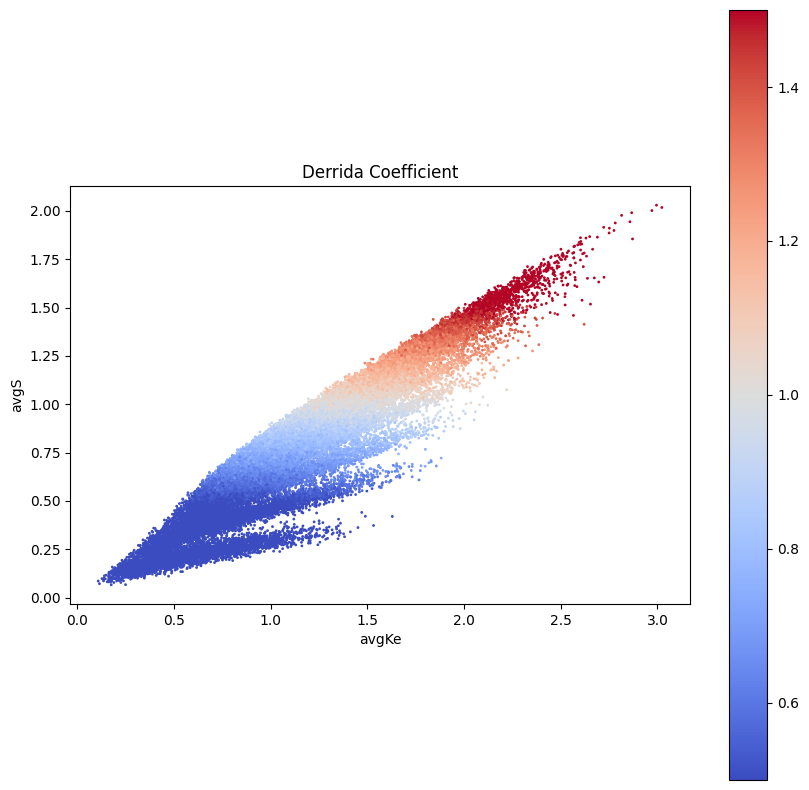

In [8]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgKe'
vary = 'avgS'
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('Derrida Coefficient')
plt.show()

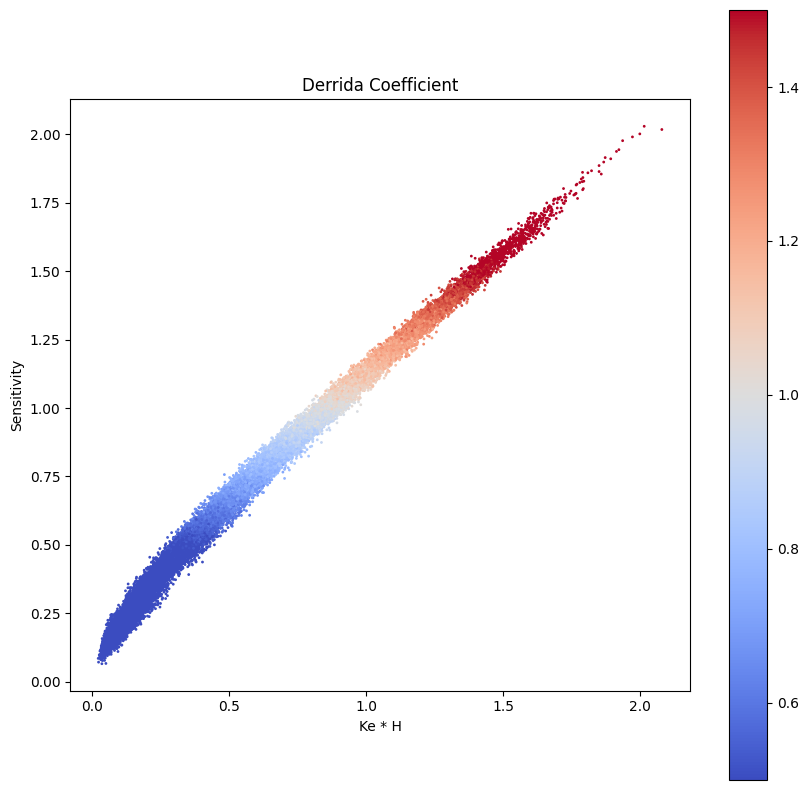

In [9]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall['avgKe_ent'],dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_xlim((0,5))
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("Ke * H")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

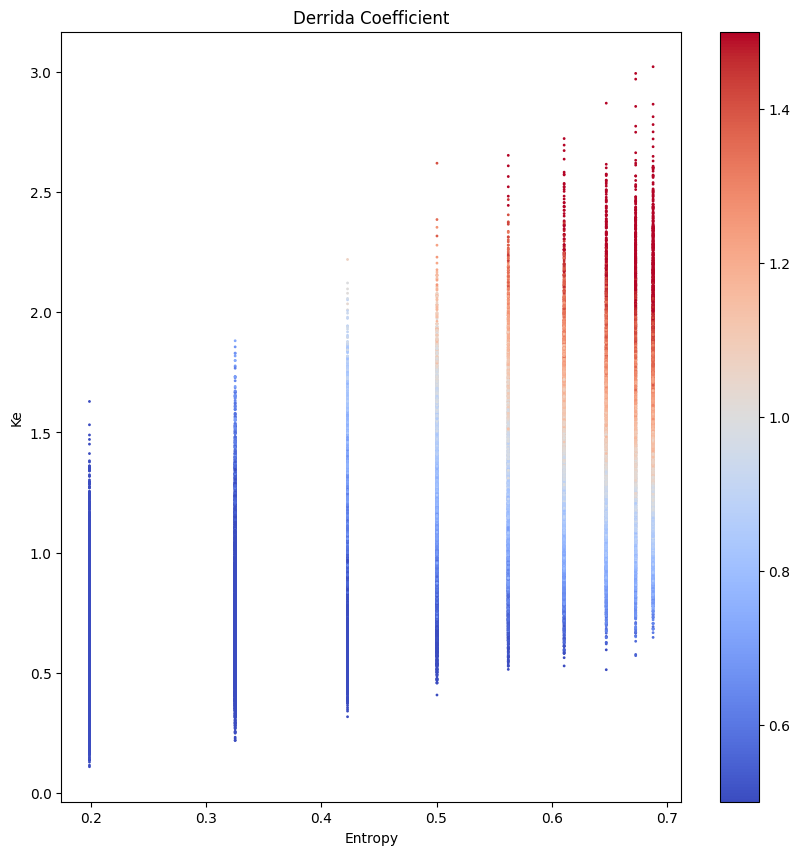

In [10]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall['entropy'],dfall['avgKe'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("Entropy")
plt.ylabel("Ke")
plt.title('Derrida Coefficient')
plt.show()

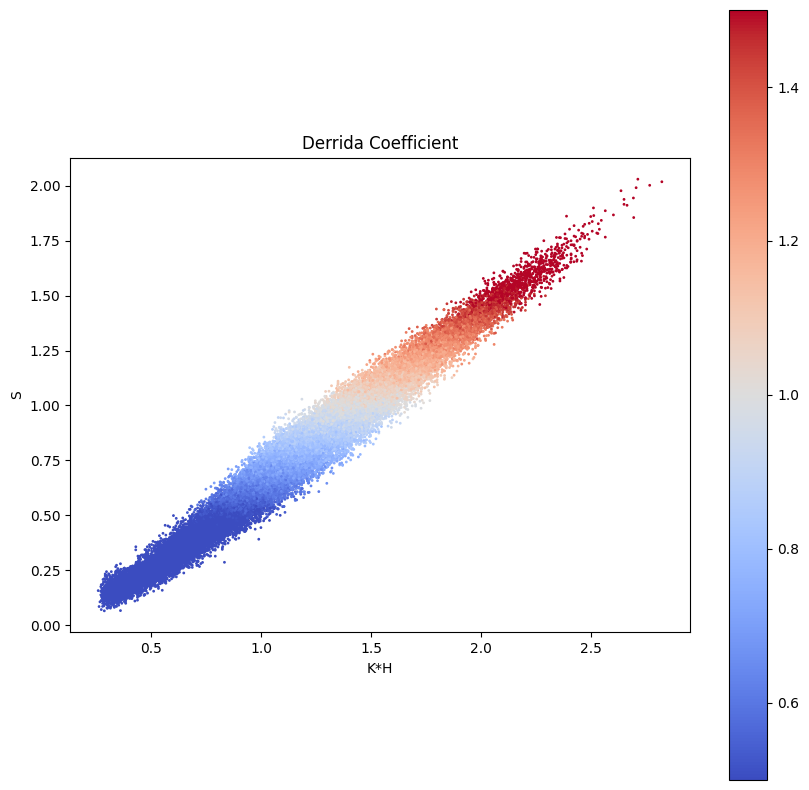

In [11]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall['avgK']*(dfall['avgKe_ent']/dfall['avgKe']), dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_xlim((0,5))
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("K*H")
plt.ylabel("S")
plt.title('Derrida Coefficient')
plt.show()

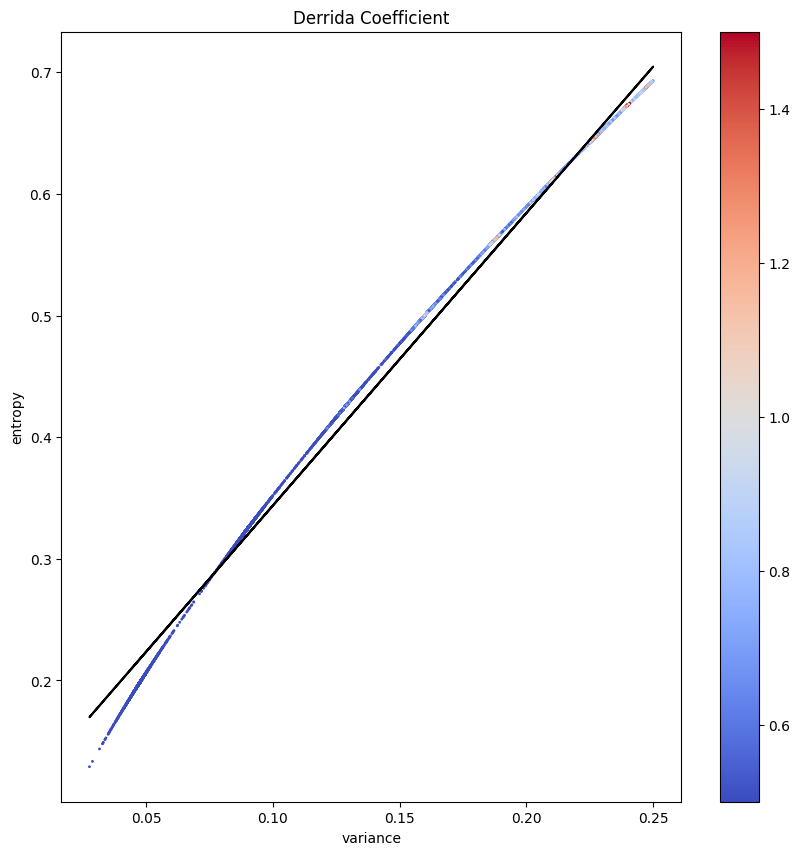

In [12]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall['avgV'],dfall['avgH'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)

linear_model=np.polyfit(dfall['variance'],dfall['entropy'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(dfall['avgV'],linear_model_fn(dfall['avgV']),color="black")

#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("variance")
plt.ylabel("entropy")
plt.title('Derrida Coefficient')
plt.show()

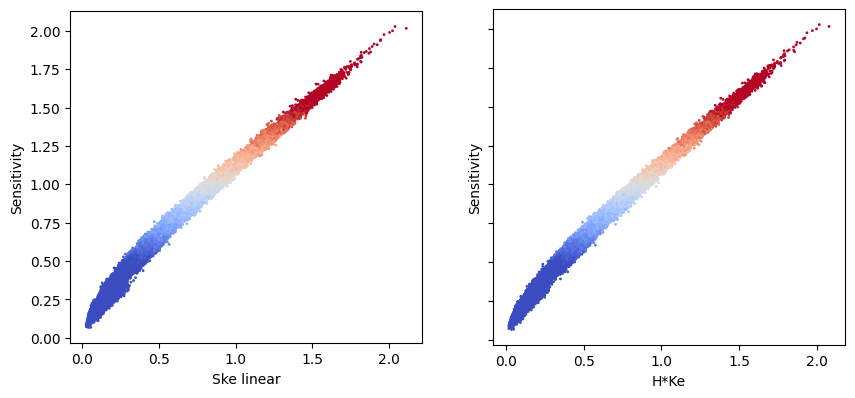

In [13]:
fig, ax = plt.subplots(1,2,sharey='row',figsize=(10, 10),facecolor='white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax[0].scatter(dfall['avgKe']*linear_model_fn(dfall['variance']),dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax[0].set_aspect('equal', 'box')
ax[0].set_xlabel("Ske linear")
ax[0].set_ylabel("Sensitivity")

sc=ax[1].scatter(dfall['avgKe']*dfall['avgH'],dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax[1].set_aspect('equal', 'box')
ax[1].set_xlabel("H*Ke")
ax[1].set_ylabel("Sensitivity")
#plt.title('Derrida Coefficient')
plt.show()

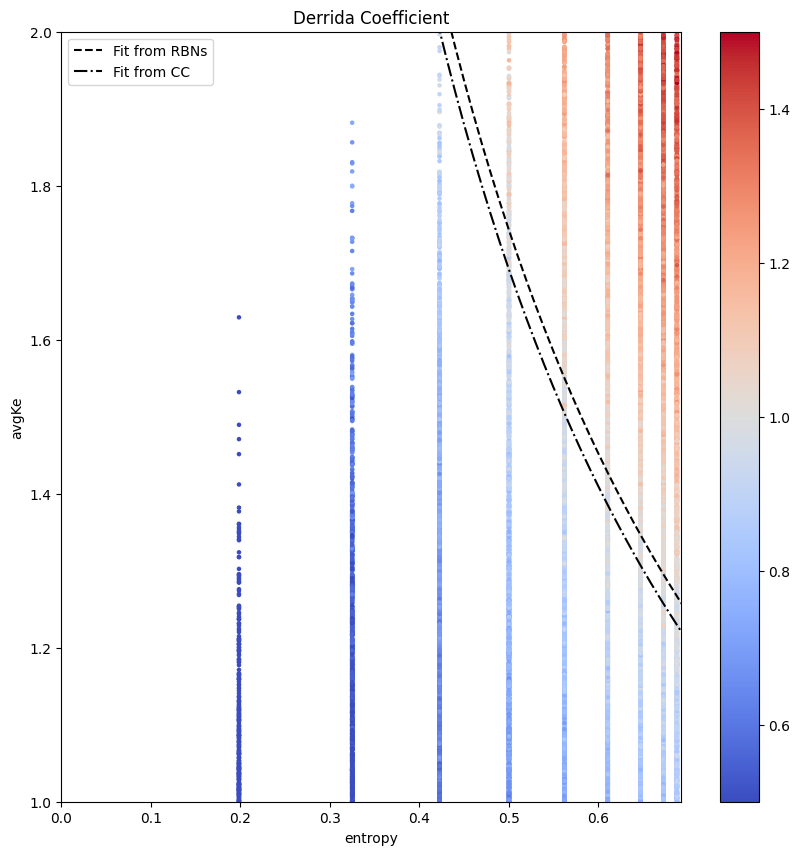

In [14]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'entropy'
vary = 'avgKe'
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=5,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0,label=None)
px = np.arange(0.01,1,0.01)
py=(1-0.15)/(px*0.975)
py2=(1-0.78)/(px*0.26)
ax.plot(px,py,'--k',label='Fit from RBNs')
ax.plot(px,py2,'-.k',label='Fit from CC')
ax.set_ylim(1,2)
ax.set_xlim(0,np.log(2))
plt.colorbar(sc)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('Derrida Coefficient')
plt.legend()
plt.show()

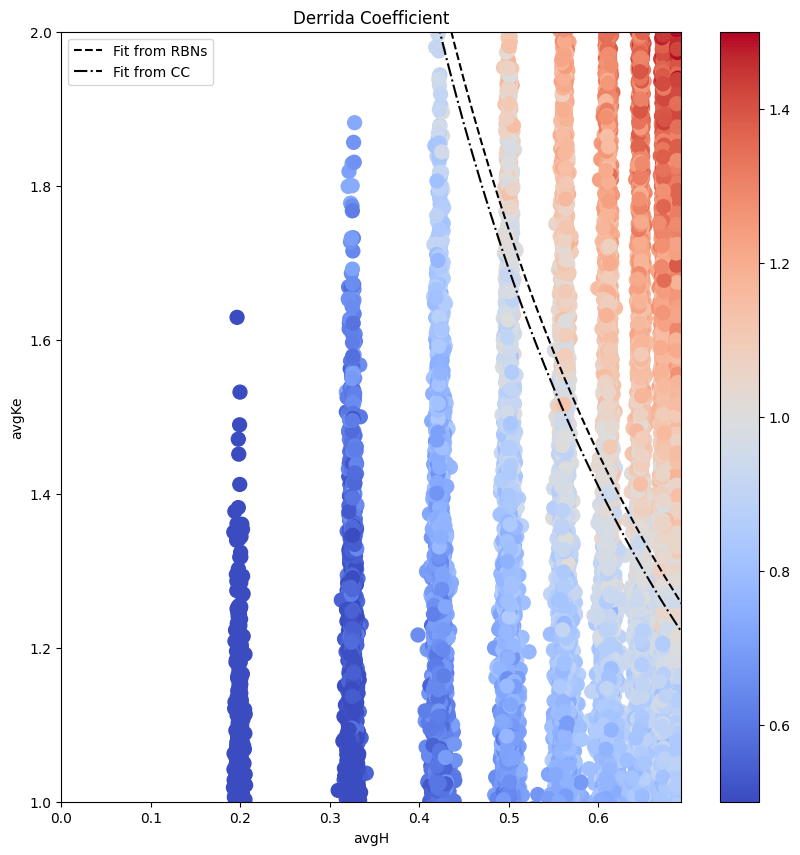

In [15]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgH'
vary = 'avgKe'
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=100,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0,label=None)
px = np.arange(0.01,1,0.01)
py=(1-0.15)/(px*0.975)
py2=(1-0.78)/(px*0.26)
ax.plot(px,py,'--k',label='Fit from RBNs')
ax.plot(px,py2,'-.k',label='Fit from CC')
ax.set_ylim(1,2)
ax.set_xlim(0,np.log(2))
plt.colorbar(sc)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('Derrida Coefficient')
plt.legend()
plt.show()

In [16]:
dfall_trim = dfall.sample(frac=1.0)


m,b,r,p,s=stats.linregress(dfall_trim['variance'],dfall_trim['entropy'])
print('V-H:  ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgS'],dfall_trim['Derrida'])
print('S-d:  ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgKe_ent'],dfall_trim['Derrida'])
print('HKe-d:',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

mVH,bVH,_,_,_=stats.linregress(dfall_trim['variance'],dfall_trim['entropy'])
m,b,r,p,s=stats.linregress(dfall_trim['avgKe']*(mVH*dfall_trim['variance']+bVH),dfall_trim['Derrida'])
print('LKe-d:',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgK']*dfall_trim['entropy'],dfall_trim['Derrida'])
print('HK-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgK']*(mVH*dfall_trim['variance']+bVH),dfall_trim['Derrida'])
print('LK-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgSe'],dfall_trim['Derrida'])
print('Se-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgSk'],dfall_trim['Derrida'])
print('Sk-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(((dfall_trim['avgK']+dfall_trim['avgKe'])/2)*dfall_trim['entropy'],dfall_trim['Derrida'])
print('Sk-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')


V-H:   r**2 = 0.995850808901554,	m = 2.404418246896262,	b = 0.10352369332329742,	p = 0.0,	s = 0.0008180039622846006
S-d:   r**2 = 0.9940058507963684,	m = 1.0001248581610396,	b = -0.0001360630509447125,	p = 0.0,	s = 0.0004093401455647688
HKe-d: r**2 = 0.9836123960219939,	m = 0.9747066518105271,	b = 0.15376958892383663,	p = 0.0,	s = 0.0006631022126070206
LKe-d: r**2 = 0.9804757017399496,	m = 0.9657922547088051,	b = 0.1596028832895593,	p = 0.0,	s = 0.0007183131729602078
HK-d:  r**2 = 0.9641976348986829,	m = 0.77239668182339,	b = -0.12504810031471714,	p = 0.0,	s = 0.0007844658471289815
LK-d:  r**2 = 0.9669059859909398,	m = 0.7745885285888884,	b = -0.12756397129803443,	p = 0.0,	s = 0.0007552912846434327
Se-d:  r**2 = 0.978112896528535,	m = 0.7919325021427274,	b = 0.20631815387899788,	p = 0.0,	s = 0.0006243794978062747
Sk-d:  r**2 = 0.977147585216321,	m = 0.9987172016916621,	b = 0.0007225317327552716,	p = 0.0,	s = 0.0008049878238638682
Sk-d:  r**2 = 0.9778256777681277,	m = 0.8663075983615177

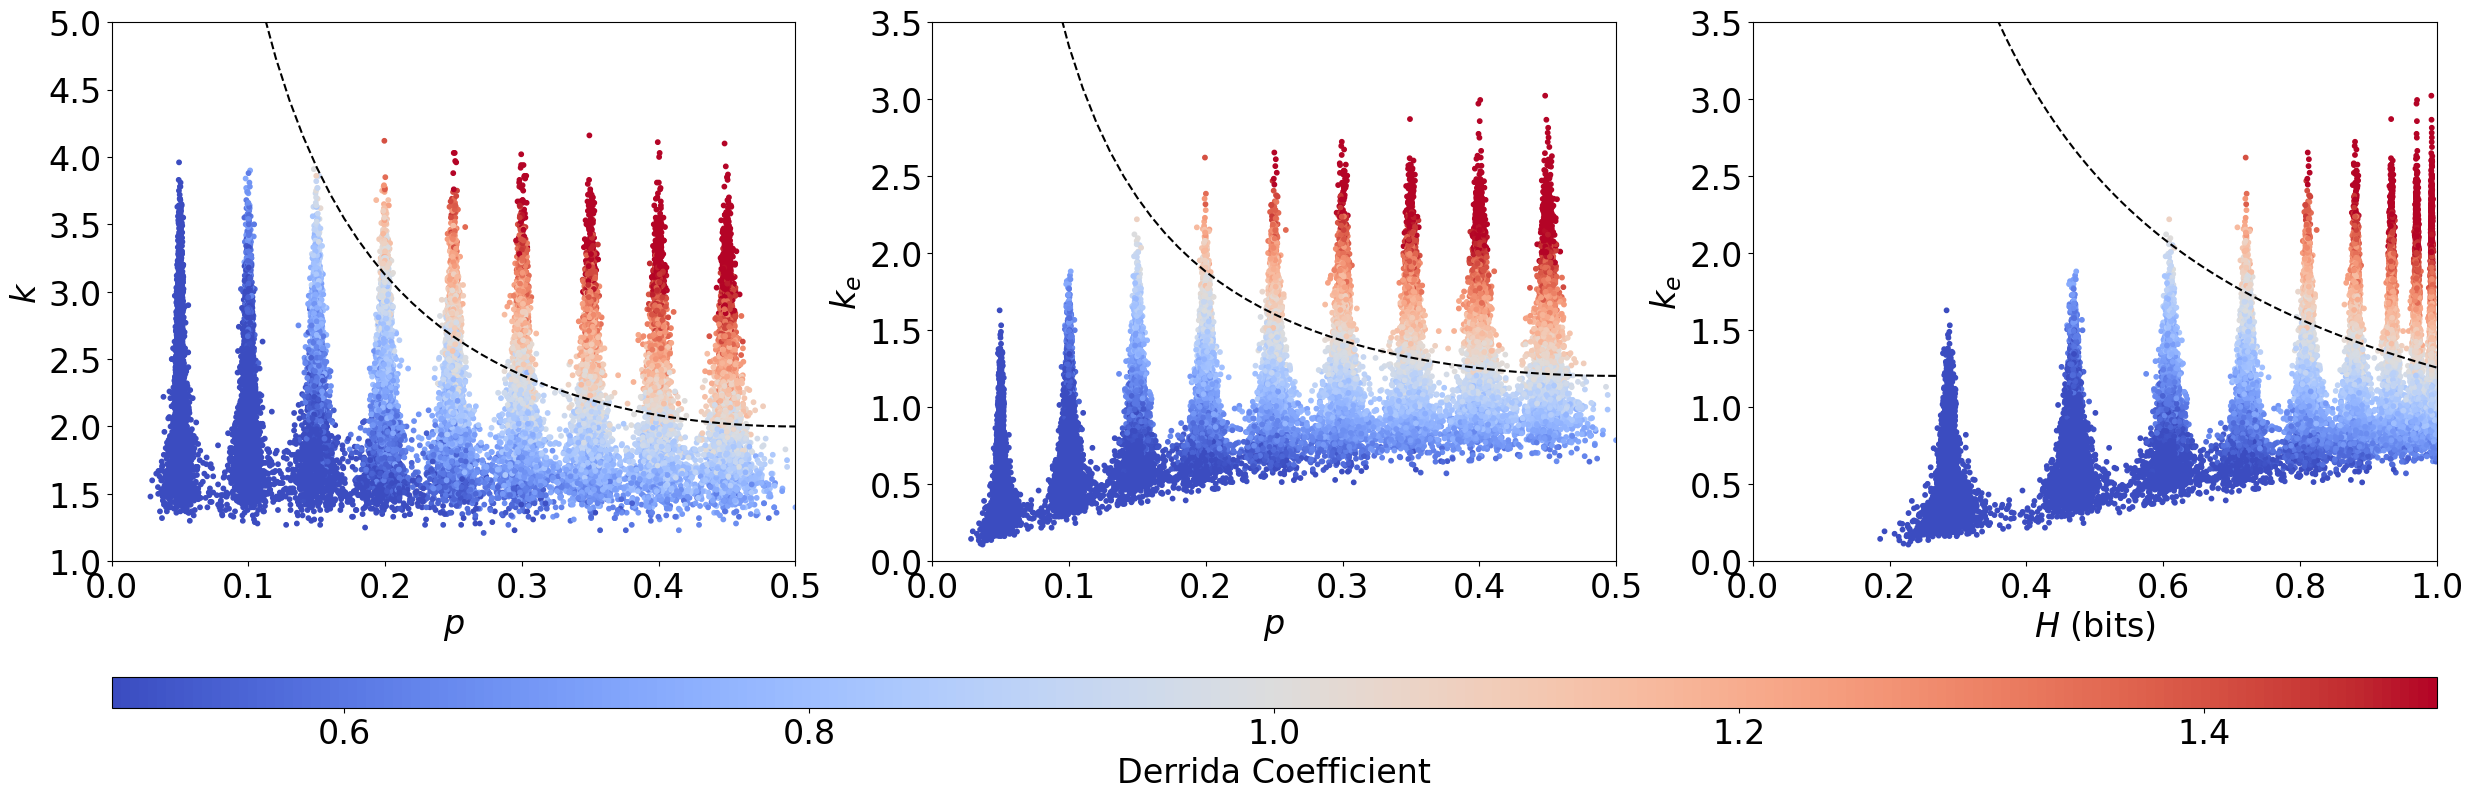

<Figure size 640x480 with 0 Axes>

In [17]:
fig, ax = plt.subplots(1,3,figsize=(30, 10),facecolor='white')

fs = 24
msize=10
cmap = plt.cm.get_cmap('coolwarm')#.reversed()

varx = 'avgP'
vary = 'avgK'
sc=ax[0].scatter(dfall[varx],dfall[vary],s=msize,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
px = np.arange(0.01,0.51,0.01)
py=1/(2*px*(1-px))
py2=(1-0.9040361570466304)/(0.1373657043428697*px*(1-px))
ax[0].plot(px,py,'--k',label='Linear critical boundary fit')
#ax[0].plot(px,py2,'-.k',label='Fit from CC')
ax[0].set_ylim(1,5)
ax[0].set_xlim(0,0.5)
#ax[0].legend(loc='upper left',fontsize=fs)
ax[0].set_xlabel('$p$',fontsize=fs)
ax[0].set_ylabel('$k$',fontsize=fs)
ax[0].tick_params(axis='both', which='major', labelsize=fs)

varx = 'avgP'
vary = 'avgKe'
sc=ax[1].scatter(dfall[varx],dfall[vary],s=msize,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
px = np.arange(0.01,0.51,0.01)
py=(1-.2065)/(0.792*3.33*px*(1-px))
py2=(1-0.809)/(0.645*px*(1-px))
ax[1].plot(px,py,'--k',label='Linear critical boundary fit')
#ax[1].plot(px,py2,'-.k',label='Fit from CC')
ax[1].set_ylim(0,3.5)
ax[1].set_xlim(0,0.5)
#ax[1].legend(loc='upper left',fontsize=fs)
ax[1].set_xlabel('$p$',fontsize=fs)
ax[1].set_ylabel('$k_e$',fontsize=fs)
ax[1].tick_params(axis='both', which='major', labelsize=fs)

varx = 'avgH'
vary = 'avgKe'
sc=ax[2].scatter(dfall[varx]/np.log(2),dfall[vary],s=msize,c=dfall['Derrida'],cmap=cmap,
              norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0,label=None)
px = np.arange(0.01,1.1,0.01)
py=(1-0.15)/(px*0.975*np.log(2))
py2=(1-0.78)/(px*0.26*np.log(2))
ax[2].plot(px,py,'--k',label='Linear critical boundary fit')
#ax[2].plot(px,py2,'-.k',label='Fit from CC')
ax[2].set_ylim(0,3.5)
ax[2].set_xlim(0,1)
#ax[2].legend(loc='upper left',fontsize=fs)
ax[2].set_xlabel('$H$ (bits)',fontsize=fs)
ax[2].set_ylabel('$k_e$',fontsize=fs)
ax[2].tick_params(axis='both', which='major', labelsize=fs)

cbar=fig.colorbar(sc,ax=ax,location='bottom',aspect=75)
cbar.ax.tick_params(axis='both',labelsize=fs)
cbar.set_label('Derrida Coefficient',fontsize=fs)
#fig.suptitle('Derrida Coefficient',fontsize=fs)

plt.show()
plt.savefig('boundary_fits_on_rbn_networks.png')

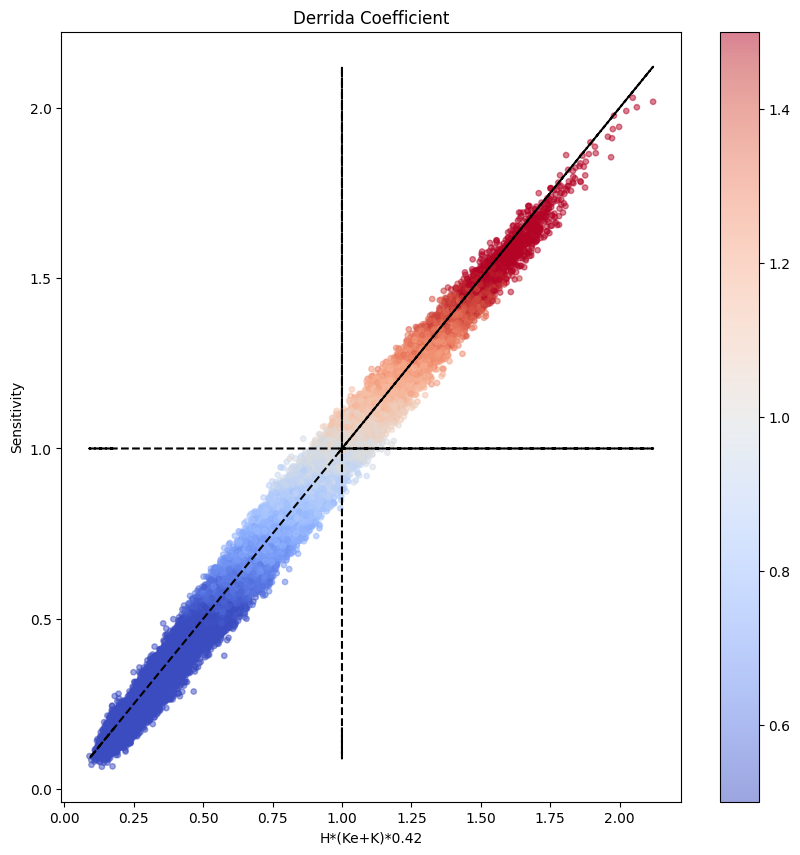

In [18]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')
x=.3*(dfall['avgKe']+dfall['avgK'])*dfall['avgH']/np.log(2)
sc=ax.scatter(x,dfall['avgS'],s=15,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=0.5)
ax.plot(x,x,'k--')
ax.plot(x,x/x,'k--')
ax.plot(x/x,x,'k--')
#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("H*(Ke+K)*0.42")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

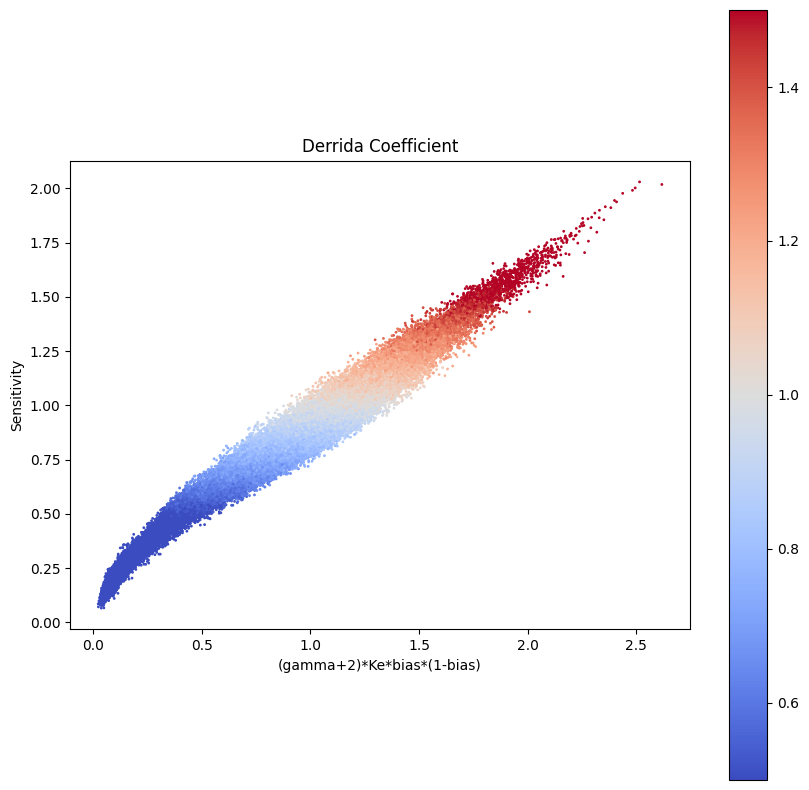

In [19]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter((dfall['gamma']+2)*dfall['avgKe']*dfall['bias']*(1-dfall['bias']),dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("(gamma+2)*Ke*bias*(1-bias)")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

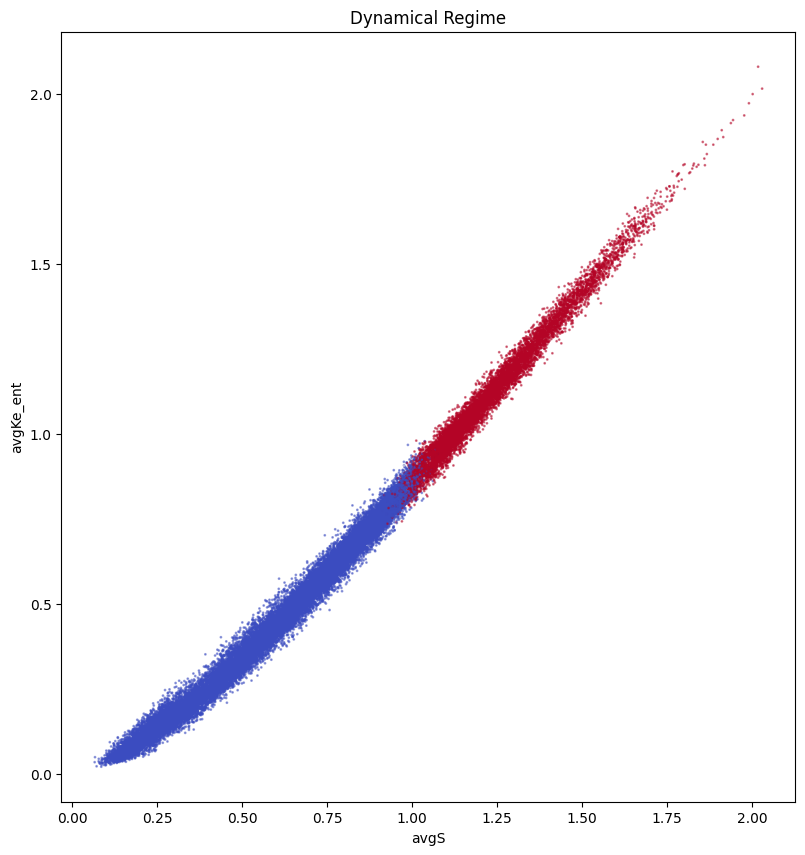

In [20]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgS'
vary = 'avgKe_ent'
cmap = plt.cm.get_cmap('coolwarm')#.reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['regime'],cmap=cmap,norm=CenteredNorm(vcenter=0,halfrange=1.0),alpha=0.5)
ax.set_aspect('equal', 'box')
plt.xlabel(varx)
plt.ylabel(vary)
plt.title("Dynamical Regime")
plt.show()

In [21]:
max([(np.mean(dfall['regime']==((dfall['avgSk']*scale>1).astype(int)-(dfall['avgSk']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9610833333333333, 1.008499999999944)

In [22]:
max([(np.mean(dfall['regime']==((dfall['avgSe_sample']*scale>1).astype(int)-(dfall['avgSe_sample']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9630833333333333, 0.9759999999999476)

In [23]:
max([(np.mean(dfall['regime']==((dfall['avgSe']*scale>1).astype(int)-(dfall['avgSe']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9682222222222222, 1.0044999999999444)

In [24]:
max([(np.mean(dfall['regime']==((dfall['avgS']*scale>1).astype(int)-(dfall['avgS']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9794722222222222, 0.9999999999999449)

In [25]:
print(max([(np.mean(dfall['regime']==((dfall['avgKe_ent']*scale>1).astype(int)-(dfall['avgKe_ent']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)]))
print(max([(np.mean(dfall['regime']==((dfall['avgKe_ent']*scale>1).astype(int)-(dfall['avgKe_ent']*scale<1).astype(int))),scale) for scale in [1]]))

(0.9735833333333334, 1.1579999999999275)
(0.9063888888888889, 1)


In [26]:
regime_truth = dfall['regime']

regime_S = ((dfall['avgS']>1).astype(int)-(dfall['avgS']<1).astype(int))

x = (dfall['avgKe'] * dfall['avgV'])*0.792*3.33 + 0.2065
regime_Se = ((x>1).astype(int)-(x<1).astype(int))

x = (dfall['avgK'] * dfall['avgV'])*2
regime_Sk = ((x>1).astype(int)-(x<1).astype(int))

x = (dfall['avgKe'] * dfall['avgH'])*0.975 + 0.15
regime_Ke_ent = ((x>1).astype(int)-(x<1).astype(int))

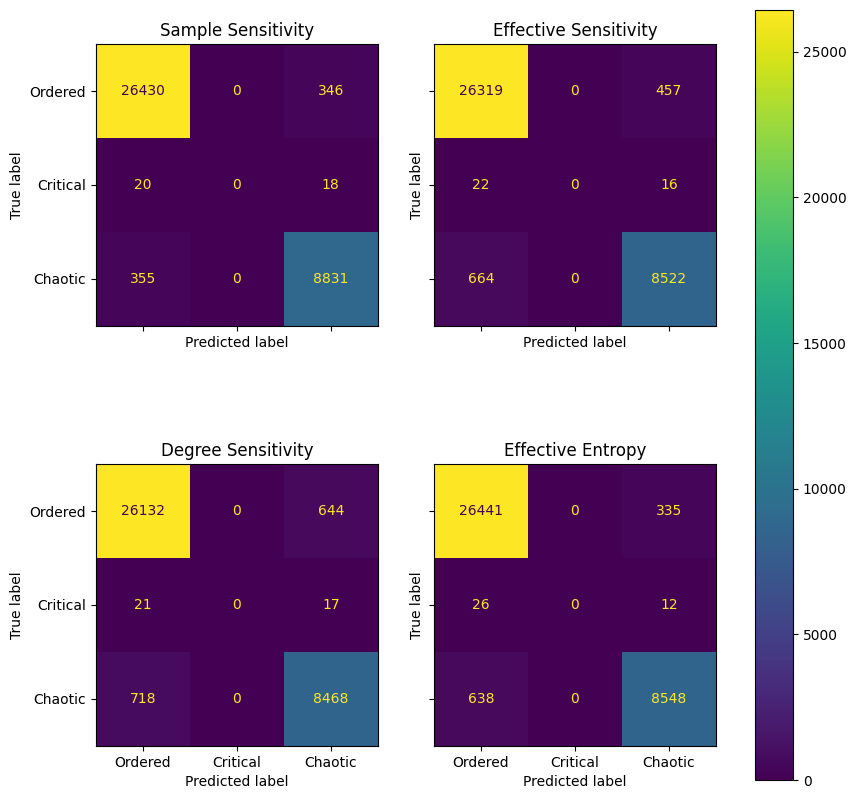

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey='row', sharex='col', facecolor='white')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_S)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0,0])
cm_display.im_.colorbar.remove()
ax[0,0].set_title('Sample Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Se)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0,1])
cm_display.im_.colorbar.remove()
ax[0,1].set_title('Effective Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1,0])
cm_display.im_.colorbar.remove()
ax[1,0].set_title('Degree Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Ke_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1,1])
cm_display.im_.colorbar.remove()
ax[1,1].set_title('Effective Entropy')

fig.colorbar(cm_display.im_, ax=ax)
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

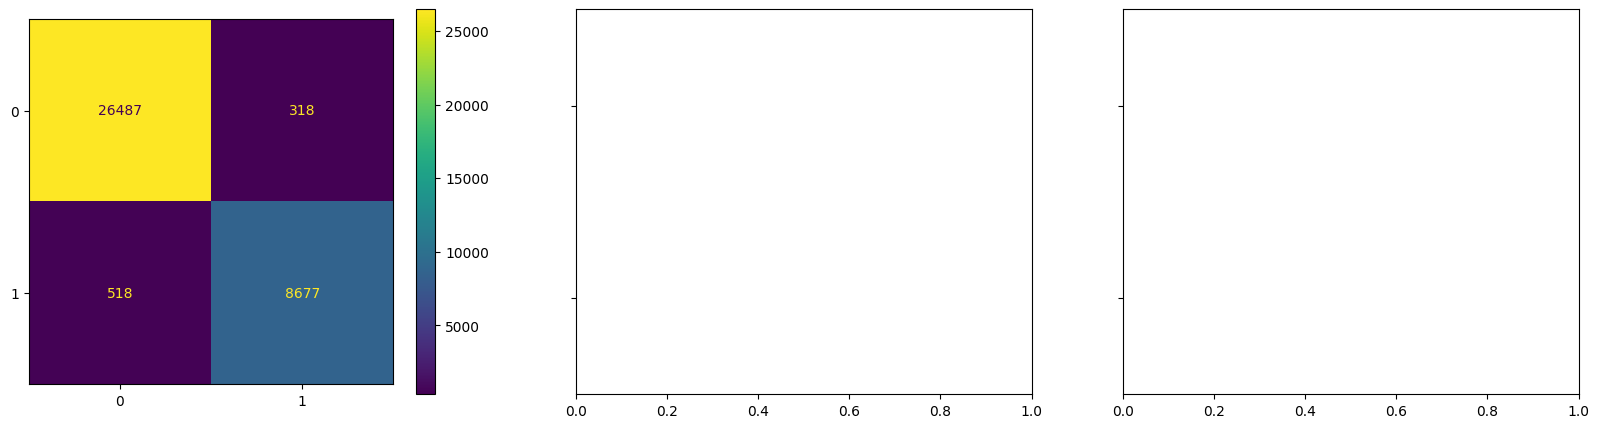

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey='row', facecolor='white')


confusion_matrix = metrics.confusion_matrix(regime_S, regime_Se)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0])
cm_display.im_.colorbar.remove()
ax[0].set_title('Effective Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_S, regime_Sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1])
cm_display.im_.colorbar.remove()
ax[1].set_title('Degree Sensitivity')


confusion_matrix = metrics.confusion_matrix(regime_S, regime_Ke_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[2])
cm_display.im_.colorbar.remove()
ax[2].set_title('Entropy Effectiveness')

fig.colorbar(cm_display.im_, ax=ax)
plt.show()

Text(0.5, 1.0, 'Entropy Effective Degree')

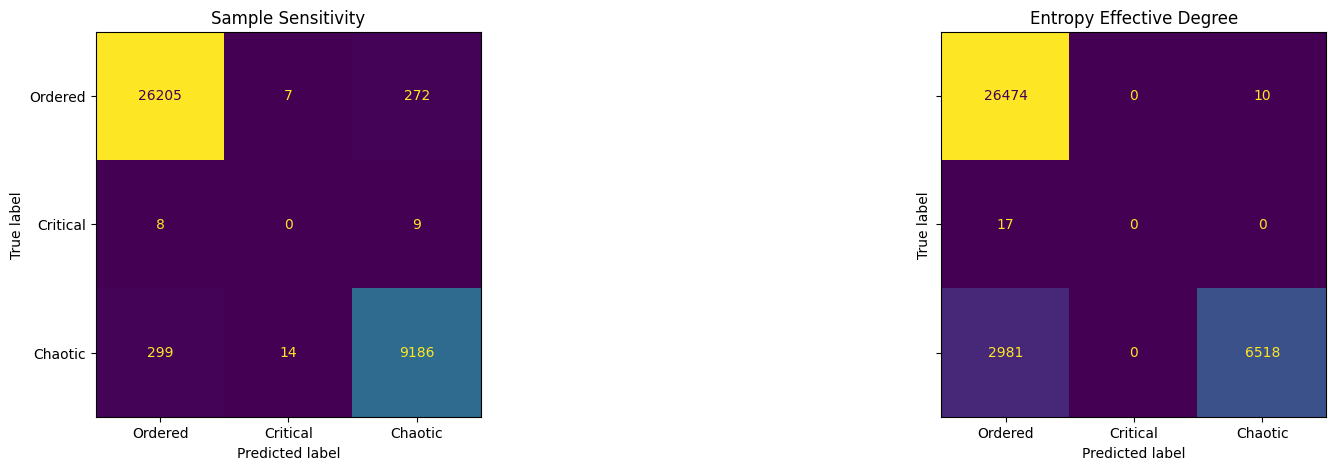

In [ ]:
p = dfall['bias']
q = 1-dfall['bias']
pfunc = -(p*np.log(p))-(q*np.log(q))
pfunc*dfall['avgKe']
regime_ent = ((pfunc*dfall['avgKe']>1).astype(int)-(pfunc*dfall['avgKe']<1).astype(int))

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey='row', facecolor='white')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_S)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0])
cm_display.im_.colorbar.remove()
ax[0].set_title('Sample Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1])
cm_display.im_.colorbar.remove()
ax[1].set_title('Entropy Effective Degree')